In [3]:
#see also http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.externals.six import StringIO
import pydot
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
import math



iris=load_iris()


#iris.data it contains the training data
#iris.target it contains the training class (rows correspond)
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(iris.data, iris.target)


#to visualize the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  


 


#print the decision tree in a pdf file
from sklearn.externals.six import StringIO
import pydot
import graphviz

graphv = graphviz.Source(dot_data) 

import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True  
                    )
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("irisDefault.pdf")


In [5]:
print "training errors:"+str((1-clf.score(iris.data,iris.target)))

training errors:0.0


In [6]:
print "Number of nodes in the tree:" +str(clf.tree_.node_count)

Number of nodes in the tree:17


In [13]:
def read_data():
    data_text = ""
    with open("skysurvey/training_data.csv","r") as f:
        data_text = f.read()
    
    data_text = data_text.split("\n")
    
    data = []
    for ligne in data_text:
        data.append(ligne.split(","))

    
    #il y a un retour à la ligne à la fin du fichier de donnés, donc une ligne vide....
    del(data[-1])

    return data

def read_class():
    cls_text = ""
    with open("skysurvey/training_class.csv","r") as f:
        cls_text = f.read()
    cls = cls_text.split("\n")
    del(cls[-1])
    return cls


def get_feature_names():
    feature_names = ""
    with open("skysurvey/Skyserver.csv","r") as f:
        feature_names = f.readline().strip()
    feature_names = feature_names.split(",")
    feature_names.remove("objid")
    feature_names.remove("class")
    return feature_names

def read_testing_set():
    data_text = ""
    with open("skysurvey/Skyserver.csv","r") as f:
        data_text = f.read()
    
    data_text = data_text.split("\n")
    
    data = []
    for ligne in data_text:
        data.append(ligne.split(","))

    
    #il y a un retour à la ligne à la fin du fichier de donnés, donc une ligne vide....
    del(data[-1])

    return data

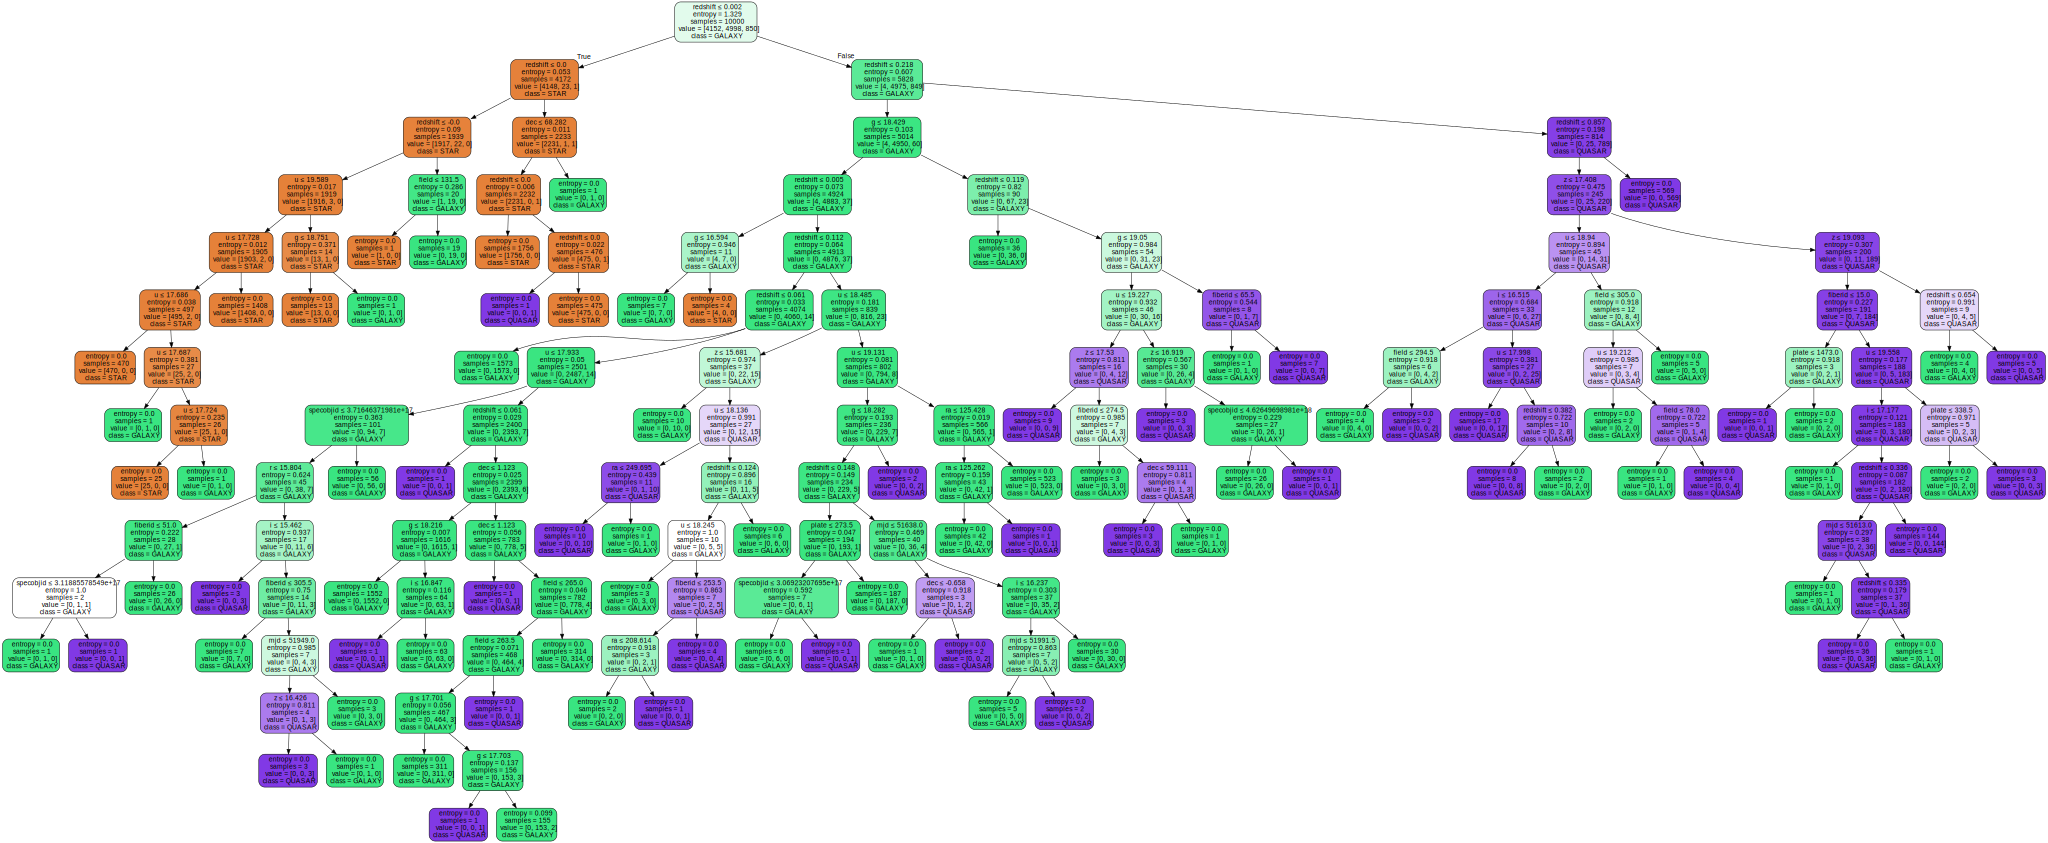

In [152]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
import graphviz

clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 1, max_depth=14)
clf = clf.fit(read_data(), read_class())

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=get_feature_names(),  
                         class_names=["STAR","GALAXY","QUASAR"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graphv = graphviz.Source(dot_data)
graphv

In [153]:
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=get_feature_names(),  
                         class_names=["STAR","GALAXY","QSO"],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("tree.pdf")

In [132]:
def training_error(clf):
    return 1-clf.score(read_data(),read_class())



print("training errors:"+str((training_error(clf))))

training errors:0.007099999999999995


In [148]:
def gen_error(clf):
    NbLeaves = 0
    for elt in clf.tree_.children_left:
        NbLeaves += (elt == -1)
    return training_error(clf)+0.5*float(NbLeaves)/10000

print("gen error:"+str((gen_error(clf))))

gen error:0.004499999999999978


In [151]:
#QUESTION 3 Met quelques minutes a s'executer !

def compute_param():
    criterions = ["gini","entropy"]
    depths = list(range(1,21)) #no point of taking deepper trees (easy to check)
    mins = list(range(1,51))
    
    best_error = 1
    best_criterion = "gini"
    best_depth = 1
    best_min = 1
    
    data = read_data()
    cls = read_class()
    
    for criterion in criterions:
        for depth in depths:
            for m in mins:
                clf = tree.DecisionTreeClassifier(criterion = criterion, min_samples_leaf = m, max_depth=depth)
                clf = clf.fit(data, cls)
                error = gen_error(clf)
                if best_error>error:
                    best_error = error
                    best_criterion = criterion
                    best_depth = depth
                    best_min = m
    
    return (best_error, best_criterion, best_depth, best_min)

RET = compute_param()
print(RET)

(0.004499999999999978, 'entropy', 14, 1)
